Step 1: Define the Problem

The task is to predict sales based on various marketing promotion strategies such as TV, social media, radio, and influencer promotions. By analyzing how these factors contribute to sales, businesses can optimize their marketing efforts and allocate resources more effectively. Predicting sales using multiple linear regression helps the business understand the impact of each marketing variable, prioritize strategies, and make data-driven decisions.

**Question**: How can predicting sales using multiple linear regression benefit the business?

 Predicting sales using multiple linear regression helps businesses understand the relationship between various marketing strategies, such as TV, social media, radio, and influencer promotions, and sales performance. By analyzing these factors, businesses can identify which marketing channels are most effective, enabling them to allocate resources more efficiently and optimize marketing efforts. This data-driven approach ensures that businesses focus on strategies that yield the best return on investment, improving overall performance and reducing unnecessary spending. 


In [2]:
import pandas as pd

# Load the dataset from Google Drive (assuming the file is shared and accessible)
import requests
from io import StringIO

def read_gd(sharingurl):
    file_id = sharingurl.split('/')[-2]
    download_url='https://drive.google.com/uc?export=download&id=' + file_id
    url = requests.get(download_url).text
    csv_raw = StringIO(url)
    return csv_raw

url = "https://drive.google.com/file/d/1WChLou3qt_JaPjYLZBMHJ8WxSssQ-enL/view?usp=drive_link"
gdd = read_gd(url)

df = pd.read_csv(gdd)

# Display the first five rows
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


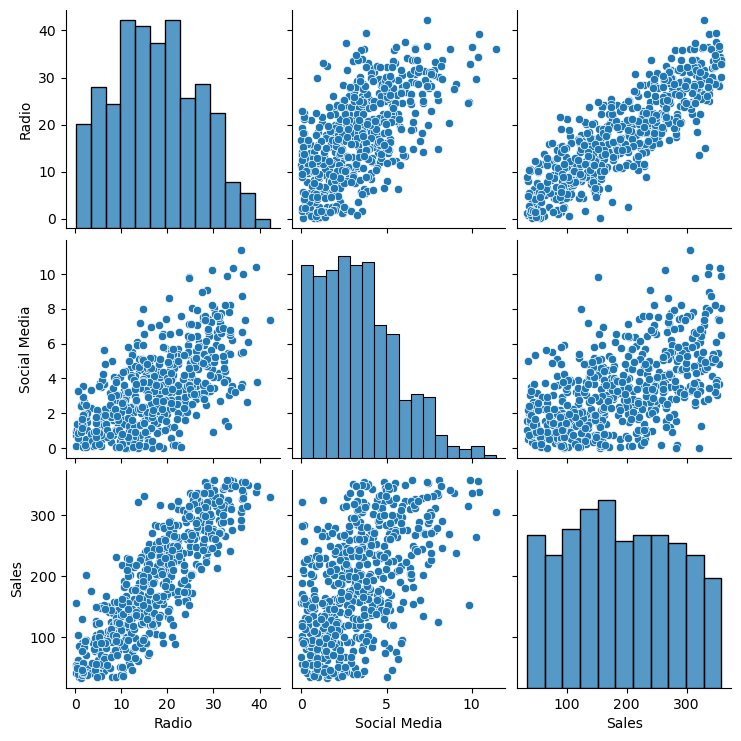

In [4]:
import seaborn as sns

# Create a pairplot to visualize the relationships between continuous variables
sns.pairplot(df)


In [6]:
# Drop rows with missing values
df = df.dropna()

# Encode categorical variables if needed (For example, using pd.get_dummies)
# Assuming there are no categorical variables in this dataset

In [8]:
# Check the shape (number of rows and columns) before dropping rows
print("Before dropping rows: ", df.shape)

# Drop rows with missing values
df = df.dropna()

# Check the shape again after dropping rows
print("After dropping rows: ", df.shape)

# Display the first few rows of the updated dataframe
print("Dataset after dropping rows with missing values:")
print(df.head())

# If needed, print the entire dataset to check
# print(df)   # This will print the entire dataset if it's not too large.


Before dropping rows:  (572, 5)
After dropping rows:  (572, 5)
Dataset after dropping rows with missing values:
       TV      Radio  Social Media Influencer       Sales
0     Low   3.518070      2.293790      Micro   55.261284
1     Low   7.756876      2.572287       Mega   67.574904
2    High  20.348988      1.227180      Micro  272.250108
3  Medium  20.108487      2.728374       Mega  195.102176
4    High  31.653200      7.776978       Nano  273.960377


In [10]:
print(df.columns)


Index(['TV', 'Radio', 'Social Media', 'Influencer', 'Sales'], dtype='object')


In [12]:
# Remove spaces from column names
df.columns = df.columns.str.replace(' ', '_')

# Check the updated column names
print(df.columns)


Index(['TV', 'Radio', 'Social_Media', 'Influencer', 'Sales'], dtype='object')


In [14]:
import statsmodels.formula.api as smf

# Define the OLS formula using updated column names
formula = 'Sales ~ TV + Radio + Social_Media + Influencer'

# Fit the model
model = smf.ols(formula=formula, data=df).fit()

# Display the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     760.4
Date:                Thu, 10 Apr 2025   Prob (F-statistic):          1.82e-282
Time:                        19:17:37   Log-Likelihood:                -2713.4
No. Observations:                 572   AIC:                             5443.
Df Residuals:                     564   BIC:                             5478.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             217.4784    

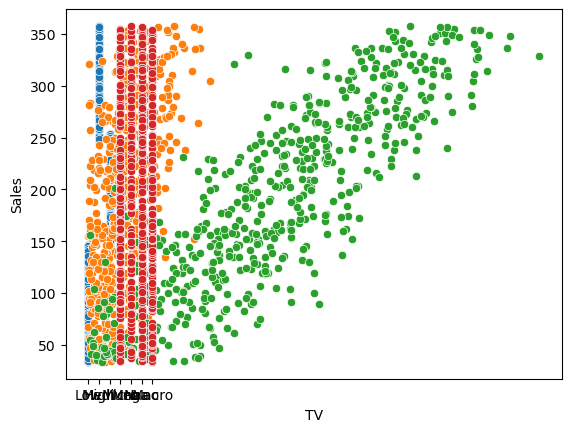

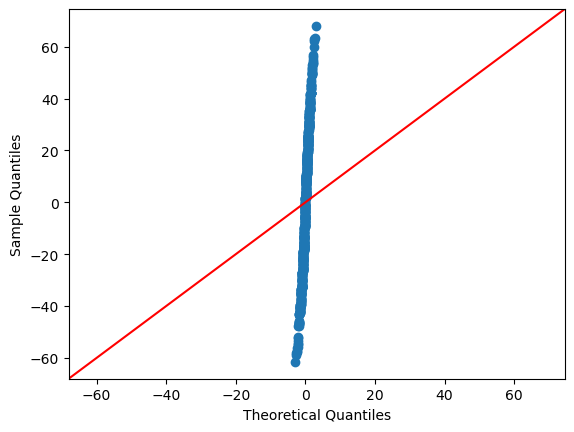

In [16]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Create scatterplots for linearity
sns.scatterplot(x=df['TV'], y=df['Sales'])
sns.scatterplot(x=df['Social_Media'], y=df['Sales'])
sns.scatterplot(x=df['Radio'], y=df['Sales'])
sns.scatterplot(x=df['Influencer'], y=df['Sales'])

# Calculate residuals and create a Q-Q plot for normality assumption
residuals = model.resid
sm.qqplot(residuals, line ='45')
plt.show()


In [18]:
# Display the model summary again to interpret the coefficients
print(model.summary())

# Interpret the coefficients and their significance
# Example: "The coefficient of TV advertising is 0.045, which means for every 1 unit increase in TV spending, sales increase by 0.045 units."


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     760.4
Date:                Thu, 10 Apr 2025   Prob (F-statistic):          1.82e-282
Time:                        19:18:54   Log-Likelihood:                -2713.4
No. Observations:                 572   AIC:                             5443.
Df Residuals:                     564   BIC:                             5478.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             217.4784    

Step 8: Considerations & Recommendations

What are some key takeaways you learned from this project?
	•	Multiple linear regression helps us understand how various marketing channels (TV, Social Media, Radio, and Influencer promotions) influence sales.
	•	It’s important to check regression assumptions like linearity, normality, and multicollinearity to ensure a reliable model.
	•	Interpreting model coefficients allows us to identify which channels are most effective and how they quantitatively impact sales.

How would you share your findings with a team?
	•	Create a short presentation or report summarizing the model, including R-squared value, key coefficients, and their significance.
	•	Use data visualizations (e.g., bar plots, scatterplots) to show how different marketing strategies affect sales.
	•	Communicate in simple terms what each variable’s impact is on the business.

What would you share with and recommend to stakeholders?
	•	Highlight which marketing channels significantly contribute to sales (based on p-values and coefficients).
	•	Recommend increasing investment in high-impact channels while reconsidering low-impact ones.
	•	Use the regression model to simulate sales scenarios and guide future marketing budget allocation.